<a href="https://colab.research.google.com/github/kapibara3chi/CooccurrenceAndWordCloud/blob/main/CooccurrenceNetworkAndWordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spacy
!pip install pandas
!pip install matplotlib
!pip install networkx
!pip install wordcloud
# !pip install -U ginza ja_ginza_electra
!pip install ginza
!pip install plantuml
!pip install ginza ja_ginza
!pip install japanize-matplotlib
!pip install plotly
# 「IPA」フォントをインストール
!apt-get -y install fonts-ipafont-gothic
# matplotlibのキャッシュをクリア
!rm /root/.cache/matplotlib/fontlist-v300.json
# Pyvisのインストール
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=3353b037f3788277223915096b63fa9254ee6f808df43da847e8df863a200320
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 19 not

{'首相': 3, '感染': 1, '拡大': 1, '防止': 1, '全力': 1, '延長': 1, '五輪': 2, '海外': 1, '観客': 1, '受け入れ': 1, '断念': 1, '政府': 1, 'IOC': 1, '最終': 1, '調整': 1, '中止': 1, '発言': 1, '反響': 1, '与党内': 1, '選択肢': 1, 'モデル': 1, '評価': 1, '医療': 1, '提供': 1, '体制': 1, '分析': 1, '改善': 1, '要請': 1, 'コロナ禍': 1, '安心': 1, '自動': 1, '運転': 1, 'バス': 1, '実証': 1, '実験': 1, '開始': 1}


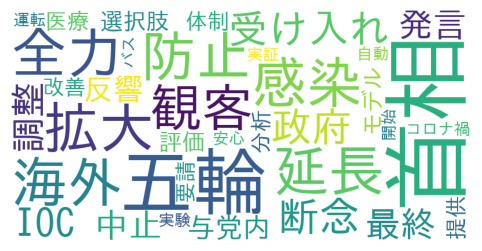

{('感染', '首相'): 1, ('拡大', '首相'): 1, ('防止', '首相'): 1, ('全力', '首相'): 1, ('延長', '首相'): 1, ('感染', '拡大'): 1, ('感染', '防止'): 1, ('全力', '感染'): 1, ('延長', '感染'): 1, ('拡大', '防止'): 1, ('全力', '拡大'): 1, ('延長', '拡大'): 1, ('全力', '防止'): 1, ('延長', '防止'): 1, ('全力', '延長'): 1, ('五輪', '海外'): 1, ('五輪', '観客'): 1, ('五輪', '受け入れ'): 1, ('五輪', '断念'): 1, ('五輪', '政府'): 1, ('IOC', '五輪'): 1, ('五輪', '最終'): 1, ('五輪', '調整'): 1, ('海外', '観客'): 1, ('受け入れ', '海外'): 1, ('断念', '海外'): 1, ('政府', '海外'): 1, ('IOC', '海外'): 1, ('最終', '海外'): 1, ('海外', '調整'): 1, ('受け入れ', '観客'): 1, ('断念', '観客'): 1, ('政府', '観客'): 1, ('IOC', '観客'): 1, ('最終', '観客'): 1, ('観客', '調整'): 1, ('受け入れ', '断念'): 1, ('受け入れ', '政府'): 1, ('IOC', '受け入れ'): 1, ('受け入れ', '最終'): 1, ('受け入れ', '調整'): 1, ('政府', '断念'): 1, ('IOC', '断念'): 1, ('断念', '最終'): 1, ('断念', '調整'): 1, ('IOC', '政府'): 1, ('政府', '最終'): 1, ('政府', '調整'): 1, ('IOC', '最終'): 1, ('IOC', '調整'): 1, ('最終', '調整'): 1, ('中止', '五輪'): 1, ('五輪', '首相'): 1, ('五輪', '発言'): 1, ('五輪', '反響'): 1, ('与党内', '五輪'): 1, ('五輪', '選択肢'): 1, ('中止

In [2]:
# 必要なライブラリをインポート
import ginza
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from wordcloud import WordCloud
import japanize_matplotlib
# import seaborn as sns
import plotly.graph_objects as go
from pyvis.network import Network

# GInzaのモデルをロード
nlp = spacy.load("ja_ginza")
# nlp = spacy.load('ja_ginza_electra')

# 分析対象テキスト例として、Yahoo!ニュースのタイトルを用意[^3^][3]
text = """
首相「感染拡大防止に全力」　緊急事態宣言延長へ
東京五輪、海外観客受け入れ断念　政府、IOCと最終調整
「五輪中止も」首相発言に反響　与党内からも「選択肢に」
菅首相「大阪モデル」評価　医療提供体制の分析・改善要請
「コロナ禍でも安心」　東京・渋谷で自動運転バス、実証実験開始
"""

# テキストを文単位に分割し、形態素解析を行う
docs = [nlp(sent) for sent in text.split("\n") if sent]

# 名詞と動詞だけを抽出し、分かち書きしたリストを作成
words = []
for doc in docs:
    words.extend([token.lemma_ for token in doc if token.pos_ in ["NOUN", "VERB"]])

# Word Cloudを作成するための辞書を作成（単語と出現回数のペア）
word_dict = {}
for word in words:
    word_dict[word] = word_dict.get(word, 0) + 1
print(word_dict)
# Word Cloudのオブジェクトを作成
fpath = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf' # フォント指定
# f_path="C:\Windows\Fonts\meiryo.ttc"
wc = WordCloud(width=800, height=400, background_color="white", font_path=fpath)

# Word Cloudに辞書を渡して描画
wc.generate_from_frequencies(word_dict)
plt.figure(figsize=(8,3))
plt.imshow(wc)
plt.axis("off")
plt.show()

# word_dictをpandasのデータフレームに変換
df = pd.DataFrame(list(word_dict.items()), columns=["word", "freq"])

# 棒グラフのオブジェクトを作成
fig = go.Figure(data=go.Bar(x=df["word"], y=df["freq"]))

# 棒グラフの表示
fig.show()

# 共起ネットワークを作成するための辞書を作成（単語のペアと共起回数のペア）
co_dict = {}
for doc in docs:
    tokens = [token.lemma_ for token in doc if token.pos_ in ["NOUN", "VERB"]]
    for i in range(len(tokens) - 1):
        for j in range(i + 1, len(tokens)):
            pair = tuple(sorted([tokens[i], tokens[j]]))
            co_dict[pair] = co_dict.get(pair, 0) + 1

print(co_dict)
# 共起ネットワークのオブジェクトを作成
G = nx.Graph()

# 共起回数が1以上の単語のペアだけをノードとエッジとして追加
for pair, freq in co_dict.items():
    if freq >= 1:
        G.add_node(pair[0])
        G.add_node(pair[1])
        G.add_edge(pair[0], pair[1], weight=freq)
print(G)
# # 共起ネットワークを描画
# plt.figure(figsize=(10,10))
# pos = nx.spring_layout(G, k=0.3) # ノードの位置をばねモデルで決定
# nx.draw_networkx(G, pos,  font_size=16,
#                  node_color="skyblue", edge_color="gray", width=2) # ネットワークを描画
# # nx.draw_networkx(G, pos, font_family="Meiryo", font_size=16,
# #                  node_color="skyblue", edge_color="gray", width=2) # ネットワークを描画
# plt.axis("off")
# plt.show()

# Pyvisでインタラクティブなグラフを生成
nt = Network("500px", "500px")
nt.from_nx(G) # NetworkXからPyvisに変換
nt.show("example.html", notebook=False) # notebookをFalseに設定


In [3]:
# Pyvisのインストール
!pip install pyvis

# visdccのインストール
!pip install visdcc


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.8/518.8 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visdcc: filename=visdcc-0.0.50-py3-none-any.whl size=518239 sha256=404aa8554e29bc6c4337532bfa5e9a4d62d07fb06333740056a90faa288f3363
  Stored in directory: /root/.cache/pip/wheels/0f/47/14/0c1bb282f77b43a1dacb5da14a61ee94edec34d74c1f1602f9
Successfully built visdcc


In [ ]:
import networkx as nx
from pyvis.network import Network

# NetworkXでグラフオブジェクトを作成
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])

# Pyvisでインタラクティブなグラフを生成
nt = Network("500px", "500px")
nt.from_nx(G) # NetworkXからPyvisに変換
nt.show("example.html", notebook=False) # notebookをFalseに設定


In [5]:
from pyvis.network import Network
from IPython.display import HTML

net = Network()
net.add_node('A', label='Aあ')
# net.add_node('A', label='Aあ',hidden=True)
net.add_node('B', label='B')
net.add_nodes(['C', 'D', 'E'], label=['C', 'D', 'E'])
net.add_edge('A','B')
net.add_edge('A','C')
net.add_edges([('A','D'), ('B','D'), ('D','E')])
net.show("example.html",notebook=False)



example.html


Number of nodes: 3
Number of edges: 3
Average degree: 2.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 12354 (\N{HIRAGANA LETTER A}) missing from current font.



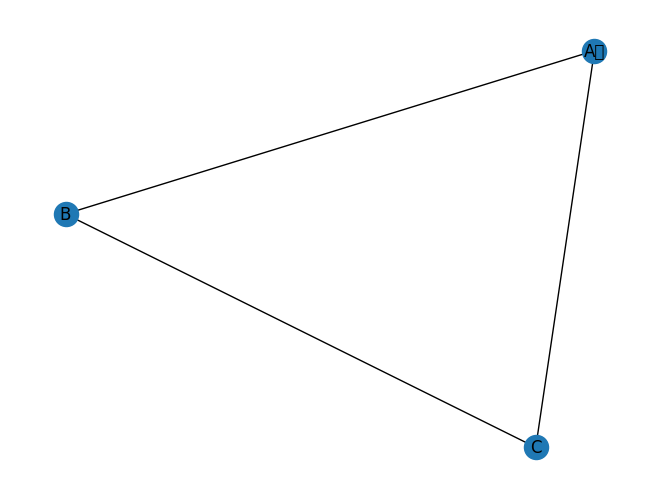

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# 空のグラフを作成
G = nx.Graph()

# ノードを追加
G.add_node("Aあ")
G.add_node("B")
G.add_node("C")

# エッジを追加
G.add_edge("Aあ", "B")
G.add_edge("B", "C")
G.add_edge("C", "Aあ")

# グラフの情報を表示
# ノード数を表示
print("Number of nodes:", len(G.nodes))

# エッジ数を表示
print("Number of edges:", len(G.edges))

# 平均次数を表示
print("Average degree:", sum(dict(G.degree).values()) / len(G.nodes))


# グラフを描画
nx.draw(G, with_labels=True)
plt.show()


In [7]:
# Dashのインストール
!pip install dash

# PyVisのインストール
!pip install pyvis

# NetworkXのインストール
!pip install networkx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 27.6 MB/s eta 0:00:00


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import networkx as nx
from pyvis.network import Network

# NetworkXでグラフオブジェクトを作成
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5], color="red") # ノードにcolor属性を追加
G.add_nodes_from([6, 7, 8, 9, 10], color="blue")
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)], weight=1) # エッジにweight属性を追加
G.add_edges_from([(6, 7), (7, 8), (8, 9), (9, 10), (10, 6)], weight=2)
G.add_edges_from([(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)], weight=3)

# PyVisでインタラクティブなグラフに変換し、HTMLファイルに出力
nt = Network("500px", "500px")
nt.from_nx(G) # NetworkXからPyVisに変換
nt.show("graph.html",notebook=False) # HTMLファイルに出力

# Dashでウェブアプリケーションを作成
app = dash.Dash(__name__)

# レイアウトの定義
app.layout = html.Div([
    html.H1("NetworkX Graph Search UI"),
    html.Div([
        html.Label("Select attribute name:"),
        dcc.Dropdown(
            id="attr-name-dropdown",
            options=[
                {"label": "color", "value": "color"},
                {"label": "weight", "value": "weight"}
            ],
            value="color"
        ),
        html.Label("Select attribute value:"),
        dcc.Dropdown(
            id="attr-value-dropdown",
            options=[
                {"label": "red", "value": "red"},
                {"label": "blue", "value": "blue"},
                {"label": "1", "value": 1},
                {"label": "2", "value": 2},
                {"label": "3", "value": 3}
            ],
            value="red"
        ),
        html.Button("Search", id="search-button")
    ], style={"width": "20%", "display": "inline-block"}),
    html.Div([
        html.Iframe(id="graph-iframe", srcDoc=open("graph.html", "r").read(), width="500px", height="500px"),
        html.Label("Select element:"),
        dcc.Dropdown(id="element-dropdown"),
        html.Label("Element information:"),
        dcc.Textarea(id="element-info", readOnly=True)
    ], style={"width": "70%", "display": "inline-block", "vertical-align": "top"})
])

# コールバックの定義
@app.callback(
    Output("graph-iframe", "srcDoc"),
    Output("element-dropdown", "options"),
    Input("search-button", "n_clicks"),
    State("attr-name-dropdown", "value"),
    State("attr-value-dropdown", "value")
)
def update_graph(n_clicks, attr_name, attr_value):
    # 検索ボタンが押されたら、グラフを更新する
    if n_clicks:
        # グラフオブジェクトをコピーする
        G_copy = G.copy()
        # 属性名と属性値に一致する要素を検索する
        if attr_name == "color":
            # ノードの場合
            nodes = [n for n, d in G_copy.nodes(data=True) if d["color"] == attr_value]
            edges = []
            for u, v, d in G_copy.edges(data=True):
                if u in nodes and v in nodes:
                    edges.append((u, v))
        else:
            # エッジの場合
            nodes = []
            edges = [(u, v) for u, v, d in G_copy.edges(data=True) if d["weight"] == attr_value]
            for u, v in edges:
                nodes.append(u)
                nodes.append(v)
        # 一致する要素以外を削除する
        G_copy.remove_nodes_from([n for n in G_copy.nodes if n not in nodes])
        G_copy.remove_edges_from([e for e in G_copy.edges if e not in edges])
        # グラフを再びPyVisに変換し、HTMLファイルに出力する
        nt = Network("500px", "500px")
        nt.from_nx(G_copy)
        nt.show("graph.html")
        # ドロップダウンメニューのオプションを更新する
        options = []
        if attr_name == "color":
            # ノードの場合
            for n in nodes:
                options.append({"label": f"Node {n}", "value": f"node-{n}"})
        else:
            # エッジの場合
            for u, v in edges:
                options.append({"label": f"Edge ({u}, {v})", "value": f"edge-({u}, {v})"})
    # HTMLファイルとオプションを返す
    return open("graph.html", "r").read(), options

@app.callback(
    Output("element-info", "value"),
    Input("element-dropdown", "value")
)
def update_info(value):
    # ドロップダウンメニューで要素が選択されたら、情報を表示する
    if value:
        # 要素の種類と番号を取得する
        element_type, element_number = value.split("-")
        # 要素の情報を取得する
        info = ""
        if element_type == "node":
            # ノードの場合
            node = int(element_number)
            info += f"Node: {node}\n"
            info += f"Color: {G.nodes[node]['color']}\n"
            info += f"Degree: {G.degree[node]}\n"
            info
# Dash アプリケーションの表示
app.run_server(mode="inline")

In [ ]:
# Ginzaをインポート
import spacy
from spacy import displacy
nlp = spacy.load("ja_ginza")

# 入力となる日本語の文章
text = "私は今日、図書館で本を借りました。その本はとても面白かったです。"

# Ginzaで形態素解析と係受け解析を行う
doc = nlp(text)

# 共起頻度を計算するメソッドを定義する
def calc_cooc_freq(doc, word1, word2, dep):
  # word1とword2は品詞の名前（"NOUN", "VERB", "ADJ"など）
  # depは係受け関係を考慮するかどうかの真偽値（TrueまたはFalse）

  # 共起頻度を格納する辞書
  cooc_freq = {}

  # 文章中の各トークンについてループ
  for token in doc:
    # トークンがword1の品詞であれば
    if token.pos_ == word1:
      # 係受け関係を考慮する場合
      if dep:
        # トークンの親ノードがword2の品詞であれば
        if token.head.pos_ == word2:
          # word1-word2ペアをキーとして辞書に追加または更新
          pair = (token.lemma_, token.head.lemma_)
          cooc_freq[pair] = cooc_freq.get(pair, 0) + 1

        # トークンの子ノードについてループ
        for child in token.children:
          # 子ノードがword2の品詞であれば
          if child.pos_ == word2:
            # word1-word2ペアをキーとして辞書に追加または更新
            pair = (token.lemma_, child.lemma_)
            cooc_freq[pair] = cooc_freq.get(pair, 0) + 1

      # 係受け関係を考慮しない場合
      else:
        # 文章中の他のトークンについてループ
        for other in doc:
          # 他のトークンがword2の品詞であれば
          if other.pos_ == word2:
            # word1-word2ペアをキーとして辞書に追加または更新
            pair = (token.lemma_, other.lemma_)
            cooc_freq[pair] = cooc_freq.get(pair, 0) + 1

  # 共起頻度を返す
  return cooc_freq


# 名詞間、名詞-動詞間、名詞-形容詞間の共起頻度をそれぞれ計算する（係受け関係あり）
noun_noun_freq_dep = calc_cooc_freq(doc, "NOUN", "NOUN", True)
noun_verb_freq_dep = calc_cooc_freq(doc, "NOUN", "VERB", True)
noun_adj_freq_dep = calc_cooc_freq(doc, "NOUN", "ADJ", True)
print(noun_adj_freq_dep)
print(noun_adj_freq_dep.items())

# 名詞間、名詞-動詞間、名詞-形容詞間の共起頻度をそれぞれ計算する（係受け関係なし）
noun_noun_freq_indep = calc_cooc_freq(doc, "NOUN", "NOUN", False)
noun_verb_freq_indep = calc_cooc_freq(doc, "NOUN", "VERB", False)
noun_adj_freq_indep = calc_cooc_freq(doc, "NOUN", "ADJ", False)

# 名詞間の共起頻度を出力（係受け関係あり）
print("名詞間の共起頻度（係受け関係あり）:")
for pair, freq in noun_noun_freq_dep.items():
  print(f"{pair[0]} - {pair[1]}: {freq}")

# 名詞-動詞間の共起頻度を出力（係受け関係あり）
print("名詞-動詞間の共起頻度（係受け関係あり）:")
for pair, freq in noun_verb_freq_dep.items():
  print(f"{pair[0]} - {pair[1]}: {freq}")

# 名詞-形容詞間の共起頻度を出力（係受け関係あり）
print("名詞-形容詞間の共起頻度（係受け関係あり）:")
for pair, freq in noun_adj_freq_dep.items():
  print(f"{pair[0]} - {pair[1]}: {freq}")

# 名詞間の共起頻度を出力（係受け関係なし）
print("名詞間の共起頻度（係受け関係なし）:")
for pair, freq in noun_noun_freq_indep.items():
  print(f"{pair[0]} - {pair[1]}: {freq}")

# 名詞-動詞間の共起頻度を出力（係受け関係なし）
print("名詞-動詞間の共起頻度（係受け関係なし）:")
for pair, freq in noun_verb_freq_indep.items():
  print(f"{pair[0]} - {pair[1]}: {freq}")

# 名詞-形容詞間の共起頻度を出力（係受け関係なし）
print("名詞-形容詞間の共起頻度（係受け関係なし）:")
for pair, freq in noun_adj_freq_indep.items():
  print(f"{pair[0]} - {pair[1]}: {freq}")


In [ ]:
# Ginzaをインポート
import spacy
from spacy import displacy
nlp = spacy.load("ja_ginza")

# 入力となる日本語の文章
text = "私は今日、図書館で本を借りました。その紙しわと濃度ムラ、モトルに関する本はとても面白かったです。"

# Ginzaで形態素解析と係受け解析を行う
doc = nlp(text)

# docの係り受け解析結果を可視化する
# displacy.render(doc, style="dep", jupyter=True)
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})



# docをPandasのDataframeに変換する関数を定義
def doc_to_df(doc):
    # docの各トークンの属性をリストに格納
    text = [token.text for token in doc]
    lemma = [token.lemma_ for token in doc]
    pos = [token.pos_ for token in doc]
    tag = [token.tag_ for token in doc]
    dep = [token.dep_ for token in doc]
    head = [token.head.text for token in doc]
    # リストをデータフレームに変換
    df = pd.DataFrame({"text": text, "lemma": lemma, "pos": pos, "tag": tag, "dep": dep, "head": head})
    return df



# 共起頻度を計算するメソッドを定義する
def calc_cooc_freq(doc, word1, word2, dep):
  # word1とword2は品詞の名前（"NOUN", "VERB", "ADJ"など）
  # depは係受け関係を考慮するかどうかの真偽値（TrueまたはFalse）

  # 共起頻度を格納する辞書
  cooc_freq = {}

  # 文章中の各トークンについてループ
  for token in doc:
    # トークンがword1の品詞であれば
    if token.pos_ == word1:
      # 係受け関係を考慮する場合
      if dep:
        # トークンの親ノードがword2の品詞であれば
        if token.head.pos_ == word2:
          print(word2)
          # word1-word2ペアをキーとして辞書に追加または更新
          pair = (token.lemma_, token.head.lemma_)
          cooc_freq[pair] = cooc_freq.get(pair, 0) + 1

        # トークンの子ノードについてループ
        for child in token.children:
          # 子ノードがword2の品詞であれば
          if child.pos_ == word2:
            # word1-word2ペアをキーとして辞書に追加または更新
            pair = (token.lemma_, child.lemma_)
            cooc_freq[pair] = cooc_freq.get(pair, 0) + 1

      # 係受け関係を考慮しない場合
      else:
        # 文章中の他のトークンについてループ
        for other in doc:
          # 他のトークンがword2の品詞であれば
          if other.pos_ == word2:
            # word1-word2ペアをキーとして辞書に追加または更新
            pair = (token.lemma_, other.lemma_)
            cooc_freq[pair] = cooc_freq.get(pair, 0) + 1

  # 共起頻度を返す
  return cooc_freq

if __name__ == '__main__':
  # docをデータフレームに変換して表示
  df = doc_to_df(doc)
  print(df)
  # 名詞間、名詞-動詞間、名詞-形容詞間の共起頻度をそれぞれ計算する（係受け関係あり）
  noun_noun_freq_dep = calc_cooc_freq(doc, "NOUN", "NOUN", True)
  noun_verb_freq_dep = calc_cooc_freq(doc, "NOUN", "VERB", True)
  noun_adj_freq_dep = calc_cooc_freq(doc, "NOUN", "ADJ", True)

  # 名詞間、名詞-動詞間、名詞-形容詞間の共起頻度をそれぞれ計算する（係受け関係なし）
  noun_noun_freq_indep = calc_cooc_freq(doc, "NOUN", "NOUN", False)
  noun_verb_freq_indep = calc_cooc_freq(doc, "NOUN", "VERB", False)
  noun_adj_freq_indep = calc_cooc_freq(doc, "NOUN", "ADJ", False)

  # 名詞間の共起頻度を出力（係受け関係あり）
  print("名詞間の共起頻度（係受け関係あり）:")
  for pair, freq in noun_noun_freq_dep.items():
    print(f"{pair[0]} - {pair[1]}: {freq}")

  # 名詞-動詞間の共起頻度を出力（係受け関係あり）
  print("名詞-動詞間の共起頻度（係受け関係あり）:")
  for pair, freq in noun_verb_freq_dep.items():
    print(f"{pair[0]} - {pair[1]}: {freq}")

  # 名詞-形容詞間の共起頻度を出力（係受け関係あり）
  print("名詞-形容詞間の共起頻度（係受け関係あり）:")
  for pair, freq in noun_adj_freq_dep.items():
    print(f"{pair[0]} - {pair[1]}: {freq}")

  # 名詞間の共起頻度を出力（係受け関係なし）
  print("名詞間の共起頻度（係受け関係なし）:")
  for pair, freq in noun_noun_freq_indep.items():
    print(f"{pair[0]} - {pair[1]}: {freq}")

  # 名詞-動詞間の共起頻度を出力（係受け関係なし）
  print("名詞-動詞間の共起頻度（係受け関係なし）:")
  for pair, freq in noun_verb_freq_indep.items():
    print(f"{pair[0]} - {pair[1]}: {freq}")

  # 名詞-形容詞間の共起頻度を出力（係受け関係なし）
  print("名詞-形容詞間の共起頻度（係受け関係なし）:")
  for pair, freq in noun_adj_freq_indep.items():
    print(f"{pair[0]} - {pair[1]}: {freq}")


In [11]:
# Ginzaをインポート
import spacy
from spacy import displacy
nlp = spacy.load("ja_ginza")

# 入力となる日本語の文章
text = "私は今日、図書館で本を借りました。その本はとても面白かったです。"

# Ginzaで形態素解析と係受け解析を行う
doc = nlp(text)

# 名詞間、名詞-動詞間、名詞-形容詞間の共起頻度を格納する辞書（係受け関係あり）
noun_noun_freq_dep = {}
noun_verb_freq_dep = {}
noun_adj_freq_dep = {}

# 名詞間、名詞-動詞間、名詞-形容詞間の共起頻度を格納する辞書（係受け関係なし）
noun_noun_freq_indep = {}
noun_verb_freq_indep = {}
noun_adj_freq_indep = {}

# 文章中の各トークンについてループ
for token in doc:
  # トークンが名詞であれば
  if token.pos_ == "NOUN":
    # トークンの親ノードが動詞であれば
    if token.head.pos_ == "VERB":
      # 名詞-動詞ペアをキーとして辞書に追加または更新（係受け関係あり）
      noun_verb_pair_dep = (token.lemma_, token.head.lemma_)
      noun_verb_freq_dep[noun_verb_pair_dep] = noun_verb_freq_dep.get(noun_verb_pair_dep, 0) + 1

    # トークンの子ノードについてループ
    for child in token.children:
      # 子ノードが名詞であれば
      if child.pos_ == "NOUN":
        # 名詞-名詞ペアをキーとして辞書に追加または更新（係受け関係あり）
        noun_noun_pair_dep = (token.lemma_, child.lemma_)
        noun_noun_freq_dep[noun_noun_pair_dep] = noun_noun_freq_dep.get(noun_noun_pair_dep, 0) + 1

      # 子ノードが形容詞であれば
      if child.pos_ == "ADJ":
        # 名詞-形容詞ペアをキーとして辞書に追加または更新（係受け関係あり）
        noun_adj_pair_dep = (token.lemma_, child.lemma_)
        noun_adj_freq_dep[noun_adj_pair_dep] = noun_adj_freq_dep.get(noun_adj_pair_dep, 0) + 1

    # 文章中の他のトークンについてループ
    for other in doc:
      # 他のトークンが動詞であれば
      if other.pos_ == "VERB":
        # 名詞-動詞ペアをキーとして辞書に追加または更新（係受け関係なし）
        noun_verb_pair_indep = (token.lemma_, other.lemma_)
        noun_verb_freq_indep[noun_verb_pair_indep] = noun_verb_freq_indep.get(noun_verb_pair_indep, 0) + 1

      # 他のトークンが名詞であれば
      if other.pos_ == "NOUN":
        # 名詞-名詞ペアをキーとして辞書に追加または更新（係受け関係なし）
        noun_noun_pair_indep = (token.lemma_, other.lemma_)
        noun_noun_freq_indep[noun_noun_pair_indep] = noun_noun_freq_indep.get(noun_noun_pair_indep, 0) + 1

      # 他のトークンが形容詞であれば
      if other.pos_ == "ADJ":
        # 名詞-形容詞ペアをキーとして辞書に追加または更新（係受け関係なし）
        noun_adj_pair_indep = (token.lemma_, other.lemma_)
        noun_adj_freq_indep[noun_adj_pair_indep] = noun_adj_freq_indep.get(noun_adj_pair_indep, 0) + 1

# 名詞間の共起頻度を出力（係受け関係あり）
print("名詞間の共起頻度（係受け関係あり）:")
for pair, freq in noun_noun_freq_dep.items():
  print(f"{pair[0]} - {pair[1]}: {freq}")

# 名詞-動詞間の共起頻度を出力（係受け関係あり）
print("名詞-動詞間の共起頻度（係受け関係あり）:")
for pair, freq in noun_verb_freq_dep.items():
  print(f"{pair[0]} - {pair[1]}: {freq}")

# 名詞-形容詞間の共起頻度を出力（係受け関係あり）
print("名詞-形容詞間の共起頻度（係受け関係あり）:")
for pair, freq in noun_adj_freq_dep.items():
  print(f"{pair[0]} - {pair[1]}: {freq}")

# 名詞間の共起頻度を出力（係受け関係なし）
print("名詞間の共起頻度（係受け関係なし）:")
for pair, freq in noun_noun_freq_indep.items():
  print(f"{pair[0]} - {pair[1]}: {freq}")

# 名詞-動詞間の共起頻度を出力（係受け関係なし）
print("名詞-動詞間の共起頻度（係受け関係なし）:")
for pair, freq in noun_verb_freq_indep.items():
  print(f"{pair[0]} - {pair[1]}: {freq}")

# 名詞-形容詞間の共起頻度を出力（係受け関係なし）
print("名詞-形容詞間の共起頻度（係受け関係なし）:")
for pair, freq in noun_adj_freq_indep.items():
  print(f"{pair[0]} - {pair[1]}: {freq}")


名詞間の共起頻度（係受け関係あり）:
名詞-動詞間の共起頻度（係受け関係あり）:
図書館 - 借りる: 1
本 - 借りる: 1
名詞-形容詞間の共起頻度（係受け関係あり）:
名詞間の共起頻度（係受け関係なし）:
図書館 - 図書館: 1
図書館 - 本: 2
本 - 図書館: 2
本 - 本: 4
名詞-動詞間の共起頻度（係受け関係なし）:
図書館 - 借りる: 1
本 - 借りる: 2
名詞-形容詞間の共起頻度（係受け関係なし）:
図書館 - 面白い: 1
本 - 面白い: 2
名詞間の共起頻度（係受け関係あり）:
名詞-動詞間の共起頻度（係受け関係あり）:
図書館 - 借りる: 1
本 - 借りる: 1
名詞-形容詞間の共起頻度（係受け関係あり）:
名詞間の共起頻度（係受け関係なし）:
図書館 - 図書館: 1
図書館 - 本: 2
本 - 図書館: 2
本 - 本: 4
名詞-動詞間の共起頻度（係受け関係なし）:
図書館 - 借りる: 1
本 - 借りる: 2
名詞-形容詞間の共起頻度（係受け関係なし）:
図書館 - 面白い: 1
本 - 面白い: 2
